# 001086186 Srinjoy Chakravarty

# RANDOM FOREST REGRESSION

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split



TOKYO STOCK PREDICTION DATASET

In [2]:

df = pd.read_csv('UniqloStock1.csv')
#print(df)

df=df.drop("Date", axis=1)

data_top = df.head()
print(data_top)


    Open   High    Low  Close  Volume
0  42120  42330  41700  41830  610000
1  43000  43220  42540  42660  448400
2  43940  43970  43270  43270  339900
3  43140  43700  43140  43620  400100
4  43310  43660  43090  43340  358200


This is the **data**! 
We are now trying to predict the 'Close' Value based on all attributes

In [3]:

feature_names_list = sorted(list(df.columns.values.tolist()))


target = df['Close']
feature_names_list.remove('Close')
X = pd.DataFrame(df, columns=feature_names_list)
Y = pd.Series(target)


# df.drop(columns=['Wage'])
# print(X)
# print(Y)

print(X.head())


# %matplotlib inline


    High    Low   Open  Volume
0  42330  41700  42120  610000
1  43220  42540  43000  448400
2  43970  43270  43940  339900
3  43700  43140  43140  400100
4  43660  43090  43310  358200


These are the **labels**: They describe what the stock price was over a period.

In [4]:
#Close Attributes
Y

0       41830
1       42660
2       43270
3       43620
4       43340
        ...  
1221    14590
1222    14390
1223    13850
1224    13800
1225    13720
Name: Close, Length: 1226, dtype: int64

In [9]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.grid_search import GridSearchCV

Let's learn from our dataset.

In [12]:
%%time

param_grid = dict(
    max_features=np.arange(2, 5),
    max_depth=[2, 4],
    min_samples_split=[5, 10, 15, 20],
)
rfc = RandomForestRegressor(n_estimators=10)
gs = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1, iid=False)
gs.fit(X.values, Y.values)

CPU times: user 122 ms, sys: 4.15 ms, total: 127 ms
Wall time: 865 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'max_features': a

In [14]:
scores = gs.cv_results_
# print(scores)
# print(type(scores))
scores = list(scores)
print(scores[:10])

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score']


These are the parameters that investors ought to be paying attention to in order to predict stock price:

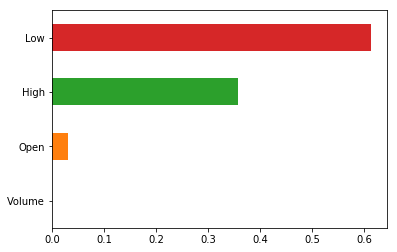

In [547]:
pd.Series(gs.best_estimator_.feature_importances_,
          index=X.columns).sort_values().plot(kind='barh')

Price indicated by the 'Close' attribute is most dependent on Low > High > Open > Volume

### RUN HERE FOR SIMPLE STANDALONE VERSION


Splitting the data into training dataset of 20%

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X.values, Y.values, test_size = 0.2,
                                                                           random_state = 42)


In [17]:
# Instantiate model
rf = RandomForestRegressor(n_estimators= 10, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors)/1000, 2))

Mean Absolute Error: 0.27


In [19]:
# Saving feature names for later use
feature_list = list(X.columns)
print(feature_list)

['High', 'Low', 'Open', 'Volume']


In [20]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: High                 Importance: 0.59
Variable: Low                  Importance: 0.4
Variable: Open                 Importance: 0.01
Variable: Volume               Importance: 0.0


# PREDICTION MODEL

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [22]:
pd.concat([df.Close, df.Close.shift(-1)], axis=1)

,Close,Close
0,41830,42660.0
1,42660,43270.0
2,43270,43620.0
3,43620,43340.0
4,43340,43480.0
...,...,...
1221,14590,14390.0
1222,14390,13850.0
1223,13850,13800.0
1224,13800,13720.0


We define X as all the columns and then we take the TRANSPOSE of X

In [23]:
X = df[[x for x in df.columns]]

In [24]:
X = X.drop(X.index[1158:1226])
X.T

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
Open,42120,43000,43940,43140,43310,43660,43900,42910,42790,43350,...,17880,18460,18540,18620,18930,18520,18900,18270,17320,17340
High,42330,43220,43970,43700,43660,43840,44370,43630,43150,43550,...,18030,18480,18670,18750,18950,18760,18900,19020,17530,17420
Low,41700,42540,43270,43140,43090,43190,43610,42860,42740,42810,...,17630,17930,18500,18540,18570,18310,18540,18240,17230,17170
Close,41830,42660,43270,43620,43340,43480,44000,43620,43130,43130,...,17850,18060,18590,18690,18860,18600,18690,18970,17470,17210
Volume,610000,448400,339900,400100,358200,381600,658900,499400,358700,542000,...,671600,784300,485100,568800,541800,626000,768500,3616500,532700,662500


We will try to predict the last 68 rows in the dataset
These modifications in the dataset allow us to predict accordingly

In [25]:
y = df.Close.shift(-68).dropna()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
rf_model.score(X_test, y_test)

0.6887831832893627

We are getting an accuracy of ~70% while predicting for almost 70 days
We then display the original value and the predicted Values

In [31]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Close
0,17589.80,16760.0
1,51226.35,53860.0
2,32698.40,26815.0
3,39990.65,56610.0
4,30855.70,31100.0
...,...,...
285,34869.20,33430.0
286,17758.30,16850.0
287,31352.10,22910.0
288,18014.70,17570.0
